In [2]:
import numpy as np
import matplotlib.pyplot as plt

Parametry zadania

In [3]:
N_USERS = 100
N_MAX = 20_000
p_login = 0.2   # niezalogowani

Funkcja symulacji

In [4]:
def simulate_task_D(N_users, N_max, p_login, start_logged=0):

    # stan użytkowników: 1 = zalogowany, 0 = nie
    state = np.zeros(N_users, dtype=int)

    # ustawienie stanu początkowego
    if start_logged > 0:
        state[:start_logged] = 1

    # histogram odwiedzin stanów 0..N_USERS
    counts = np.zeros(N_users + 1)

    for step in range(N_max):
        x = np.sum(state)  # liczba zalogowanych

        # zliczamy odwiedziny
        counts[x] += 1

        # ---- prawdopodobieństwa zależne od x ----
        p_stay_logged = 0.008 * x + 0.1
        p_logout = 1 - p_stay_logged

        # ---- losowanie akcji ----

        # niezalogowani mogą się logować
        login_events = (state == 0) & (np.random.rand(N_users) < p_login)

        # zalogowani mogą się wylogować z nowym p_logout
        logout_events = (state == 1) & (np.random.rand(N_users) < p_logout)

        # aktualizacja stanu:
        state[login_events] = 1
        state[logout_events] = 0

    Pi_exp = counts / N_max
    return Pi_exp

Uruchomienie symulacji

In [5]:
Pi_exp = simulate_task_D(
    N_users=N_USERS,
    N_max=N_MAX,
    p_login=p_login,
    start_logged=0   # możesz zmienić na 50 lub 100
)

Wykres rozkładu Pi_EXP

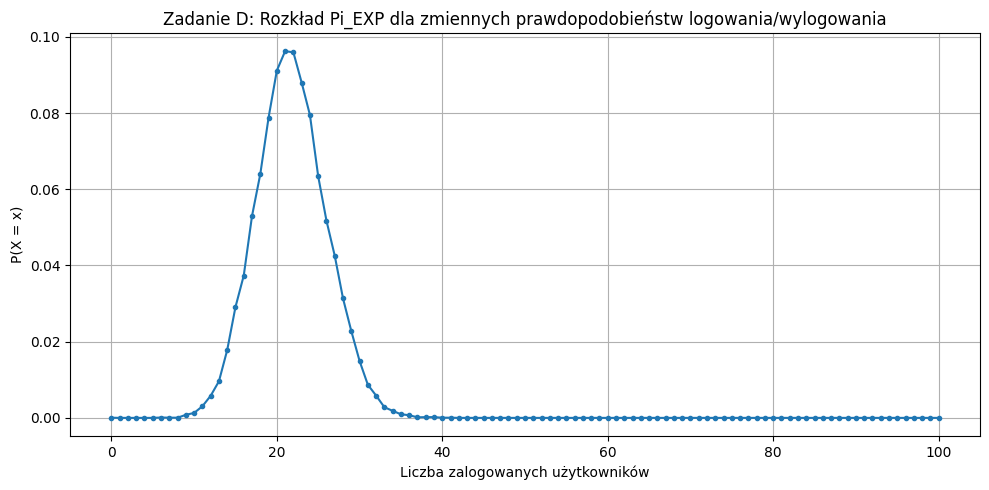

In [6]:
plt.figure(figsize=(10,5))
plt.plot(Pi_exp, marker='o', markersize=3)
plt.title("Zadanie D: Rozkład Pi_EXP dla zmiennych prawdopodobieństw logowania/wylogowania")
plt.xlabel("Liczba zalogowanych użytkowników")
plt.ylabel("P(X = x)")
plt.grid(True)
plt.tight_layout()
plt.show()

Najczęściej odwiedzane stany

In [7]:
print("\nNajczęściej występujące stany:")
for i in np.argsort(Pi_exp)[::-1][:15]:
    print(f"X = {i:3d}  -->  P = {Pi_exp[i]:.6f}")



Najczęściej występujące stany:
X =  21  -->  P = 0.096250
X =  22  -->  P = 0.095950
X =  20  -->  P = 0.091150
X =  23  -->  P = 0.088000
X =  24  -->  P = 0.079500
X =  19  -->  P = 0.078800
X =  18  -->  P = 0.064000
X =  25  -->  P = 0.063400
X =  17  -->  P = 0.053000
X =  26  -->  P = 0.051750
X =  27  -->  P = 0.042550
X =  16  -->  P = 0.037350
X =  28  -->  P = 0.031350
X =  15  -->  P = 0.029100
X =  29  -->  P = 0.022800
